# This is a runnable file

Before you run this code, please make sure you'd put all the data we need to MNIST dir.
You can read README.md for more information.


Load the packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mnistReader as mnist
from utils.layers import *
from model import NNModel

trainData = mnist.read_train_data()
taskData = mnist.read_task_data()

# magic!!
%matplotlib inline

## Show 10 MNIST imges and label

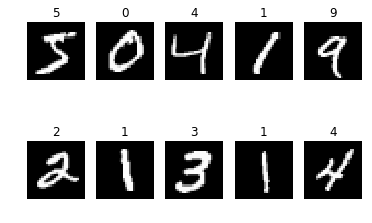

In [2]:
def showMNISTData(datas):
    """
    show 10 datas
    the data is the shape of (imgs, labels)
    """
    imgs, labs = datas
    N, W, H = imgs.shape
    plt.rcParams['image.cmap'] = 'gray'
    for i in range(10):
        plt.subplot(2, 5, i+1)
        plt.imshow(imgs[i])
        plt.title('%d'%labs[i])
        plt.gca().axis('off')
    plt.show()    
showMNISTData(trainData)

## Build a model

The model file is model.py

In [3]:
# create a new model
nn = NNModel()

Train the model for 20 times will get accuracy about 90%. If you train it more than 150 times, you will get accuracy of 100%.
This will take a lot of time. So, take a break.

epochs 10 loss 139911.80394 accuracy 0.865533333333
epochs 20 loss 75245.6740638 accuracy 0.906233333333


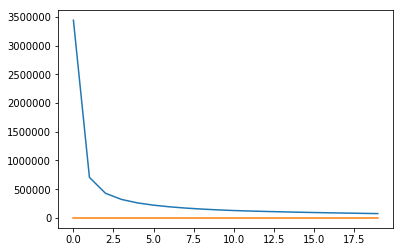

In [4]:
loss, acc = nn.train(trainData[0], trainData[1], 20, batchs=1000, learning_rate=1e-3, display_per_epoch=10)
plt.plot(np.array(loss))
plt.plot(np.array(acc))
plt.show()

## Show the train result

In [5]:
# see how do the model work on task dataset
out = nn.runModel(taskData[0])
outLab = np.argmax(out, axis=1)
result = np.sum(outLab == taskData[1])
print((result/10000) * 100, '%')

89.96 %


[8 2 6 0 1 8 1 5 6 4]
[8 2 6 0 1 8 1 5 6 4]


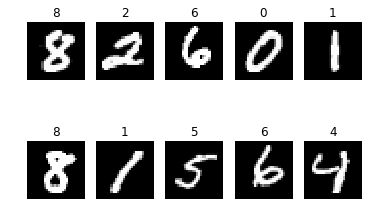

In [6]:
# test task data
inddx = np.random.choice(10000, 10)
sampedImg = taskData[0][inddx]
sampedLab = taskData[1][inddx]
out = nn.runModel(sampedImg)
outLab = np.argmax(out, axis=1)
print(outLab)
print(sampedLab)
showMNISTData((sampedImg, outLab))

## Save/Load the model

If you want to save the model, run the code below. If not, just ignore this.

In [ ]:
# save nn
import pickle
with open("model_trained.nn", 'wb') as f:
    picklestring = pickle.dump(nn, f)

In [ ]:
# read nn
nn_check = None
with open("model_trained.nn", 'rb') as f:
    nn_check = pickle.load(f)